<a href="https://colab.research.google.com/github/MaartenCVonk/Causal-Modeling/blob/main/Static_Causal_Models_with_Causal_Graphs_Region_Adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.1.5 &> /dev/nul
!pip install tables==3.5.1 &> /dev/nul
!pip install cdt &> /dev/nul
!pip install rpy2 &> /dev/nul
!sudo apt install graphviz libgraphviz-dev graphviz-dev pkg-config &> /dev/nul
!pip install pygraphviz &> /dev/nul
!pip install pydot &> /dev/nul
!pip install pyparsing==1.5.7 &> /dev/nul
!pip install GML &> /dev/nul
!pip install unidecode &> /dev/nul
!pip install dowhy &> /dev/nul
!pip install statsmodels &> /dev/nul
!pip install pickle-mixin &> /dev/nul

In [ ]:
import pandas as pd
import tables
import numpy as np
import scipy
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
import GPUtil
import unidecode
import joblib
import torch
import tqdm
import requests
import sklearn
import cdt #CDT depends on a number of other packages, including these R packages: https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/master/r_requirements.txt. 
#Please see below.
from cdt.causality.graph import GES
import networkx as nx
import GML
import dowhy
from dowhy import CausalModel
import statsmodels
import statsmodels.api 
from IPython.display import Image, display
from google.colab import auth
from itertools import product

In [ ]:
base = importr('base')
utils = importr('utils')

utils.chooseCRANmirror(ind=1)
packnames_CRAN_direct = ('devtools', 'BiocManager', 'sparsebn', 'pcalg', 'gRain', 'bnlearn') #Alternatively, 'http://www.bnlearn.com/releases/bnlearn_latest.tar.gz'
names_to_install_CRAN_direct = [x for x in packnames_CRAN_direct if not rpackages.isinstalled(x)]
if len(names_to_install_CRAN_direct) > 0:
    utils.install_packages(StrVector(names_to_install_CRAN_direct))

biocmanager = importr('BiocManager')
packnames_biocmanager = ('graph', 'RBGL', 'Rgraphviz', 'gRain')
names_to_install_biocmanager = [x for x in packnames_biocmanager if not rpackages.isinstalled(x)]
if len(names_to_install_biocmanager) > 0:
    biocmanager.install(StrVector(names_to_install_biocmanager))

devtools = importr('devtools')
packnames_github = ('cran/CAM', 'cran/D2C', 'cran/SID', 'Diviyan-Kalainathan/RCIT')
names_to_install_github = [x for x in packnames_github if not rpackages.isinstalled(x)]
if len(names_to_install_github) > 0:
    devtools.install_github(StrVector(names_to_install_github), force = True)

sparsebn = importr('sparsebn')
pcalg = importr('pcalg')
graph = importr('graph')
rbgl = importr('RBGL')
rgraphviz = importr('Rgraphviz')
bnlearn = importr('bnlearn')
cam = importr('CAM')
d2c = importr('D2C')
sid = importr('SID')
rcit = importr('RCIT')

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Warning:
R[write to console]:  dependencies ‘graph’, ‘RBGL’, ‘Rgraphviz’ are not available

R[write to console]: also installing the dependencies ‘zoo’, ‘DEoptimR’, ‘lmtest’, ‘sparsebnUtils’, ‘ccdrAlgorithm’, ‘discretecdAlgorithm’, ‘abind’, ‘igraph’, ‘ggm’, ‘corpcor’, ‘robustbase’, ‘vcd’, ‘bdsmatrix’, ‘sfsmisc’, ‘fastICA’, ‘clue’, ‘RcppArmadillo’, ‘gRbase’, ‘RcppEigen’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/zoo_1.8-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 793891 bytes (775 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

Update all/some/none? [a/s/n]: a


R[write to console]: also installing the dependencies ‘bit’, ‘bit64’, ‘vroom’, ‘tzdb’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/bit_4.0.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 279723 bytes (273 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


✔  checking for file ‘/tmp/Rtmp91e7yZ/remotes3e417b6bf0/cran-CAM-fbc593d/DESCRIPTION’ (343ms)
─  preparing ‘CAM’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘CAM_1.0.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo cran/D2C@HEAD

R[write to console]: Skipping 3 packages not available: RBGL, Rgraphviz, graph

R[write to console]: Installing 2 packages: lazy, randomForest

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/lazy_1.2-16.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 21509 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

✔  checking for file ‘/tmp/Rtmp91e7yZ/remotes3e67c5cf70/cran-D2C-482b186/DESCRIPTION’ (335ms)
─  preparing ‘D2C’:
✔  checking DESCRIPTION meta-information
✔  checking vignette meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘D2C_1.2.1.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo cran/SID@HEAD

R[write to console]: Skipping 2 packages not available: graph, RBGL

R[write to console]: Installing 2 packages: ggm, pcalg

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/ggm_2.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 109414 bytes (106 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

✔  checking for file ‘/tmp/Rtmp91e7yZ/remotes3e706678b0/cran-SID-9e4ab7e/DESCRIPTION’
─  preparing ‘SID’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘SID_1.0.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Downloading GitHub repo Diviyan-Kalainathan/RCIT@HEAD

R[write to console]: Installing 1 packages: momentchi2

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/momentchi2_0.1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 10133 bytes

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

✔  checking for file ‘/tmp/Rtmp91e7yZ/remotes3e3b918792/Diviyan-Kalainathan-RCIT-c97f91c/DESCRIPTION’ (341ms)
─  preparing ‘RCIT’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘RCIT_0.1.0.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
cdt.SETTINGS.GPU
cdt.SETTINGS.NJOBS
cdt.SETTINGS.NJOBS = 3
cdt.SETTINGS.verbose = False

In [ ]:
auth.authenticate_user()

#For the hypothesized features:
#!gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/datacube_disaggregated-admin2_flat.h5 . 
#For the dimensionality-reduced features: dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_flat.h5

#In the latter case, adjust the names of the covariates appropriately.

#World Bank Regions
!gsutil -m cp -r gs://wps_pillar1a/data_sources/WorldBank/WORLD_BANK_REGIONS_2021.xlsx  .

Copying gs://wps_pillar1a/data_sources/WorldBank/WORLD_BANK_REGIONS_2021.xlsx...
- [1/1 files][ 65.2 KiB/ 65.2 KiB] 100% Done                                    
Operation completed over 1 objects/65.2 KiB.                                     


## **Check on data**

In [ ]:
#Check if they vary across timestamps (just double check if Non-dimensionality reduction worked properly)
for region, month_date in product(['Latin America & Caribbean'],(['2019-12-01','2020-03-01','2020-06-01','2020-09-01'])):
  file ='dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_'+month_date+'_'+region+'_flat.h5'
  !gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/"$file" .
  df = pd.read_hdf(file, "table")
  print(region, month_date, df.head())

Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2019-12-01_Latin America & Caribbean_flat.h5...
/ [1/1 files][  1.6 MiB/  1.6 MiB] 100% Done                                    
Operation completed over 1 objects/1.6 MiB.                                      
Latin America & Caribbean 2019-12-01           spi     et_actl  ...  acl_viol_fatl_m_2  acl_sum_fatl_m_2
0 -169.251160  180.743515  ...                0.0               0.0
1 -327.928070  147.582718  ...                0.0               0.0
2 -326.523621  147.287842  ...                0.0               0.0
3 -293.917572  195.928772  ...                0.0               0.0
4 -327.838837  147.078278  ...                0.0               0.0

[5 rows x 27 columns]
Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2020-03

### **Define Class functions**

In [ ]:
class data_prep_bin:
  def __init__(self, data_to_preprocess, treatment, outcome, thresholds, month_date, region):
    self.data = data_to_preprocess
    self.treat = treatment
    self.out = outcome
    self.md = month_date
    self.thres = thresholds
    self.region = region
  
  def preprocess(self):
    data_=self.data
    if self.md!= None:
      data_ = self.data.loc[self.data.index.get_level_values(level = 'month_date') == self.md] # set data to specific month
      data_ = data_.droplevel(['month_date']) # drops the column
    if self.region!= None:  
      data_ = data_.loc[data_.index.get_level_values(level = 'region') == self.region] # set data to specific region
      data_ = data_.droplevel(['region']) # drops the column
    print(data_.shape)
    data_['rank_pct'] = data_[self.treat].rank(pct=True) # create new column with treatment rank as a percentile from 0 to 1
    data_[self.treat] = np.digitize(data_.rank_pct, self.thres, right=True) # Maps the rank column to 0,1,2 with < 0,25 ==> 0, 0.25<x<0.75 ==>1, > 0.75 ==>2 (see treshold)
    data_ = data_[data_[self.treat] != 1] #Remove all the data between 0,25<0,75 (cause treatment variable is not outspoken)
    data_[self.treat] = np.where(data_[self.treat] == 2, 1, 0) # map the 2 values back to 1 cause treatment is binary {0,1}
    data_[self.treat] = data_[self.treat].astype(int) # convert datatype to int
    data_ = data_.rename(columns={self.treat:'treatment: '+ self.treat}) #rename column names outcome and treatment
    data_ = data_.rename(columns={self.out:'outcome: '+ self.out}) #rename column names outcome and treatment
    data_ = data_.drop(['rank_pct'], axis=1)  #rank_pct was just help column, you can remove it.
    data_=data_.dropna()
    return data_

In [ ]:
class data_prep_con:
  def __init__(self, data_to_preprocess, treatment, outcome, thresholds, month_date, region):
    self.data = data_to_preprocess
    self.treat = treatment
    self.out = outcome
    self.md = month_date
    self.thres = thresholds
    self.region = region
  
  def preprocess(self):
    data_=self.data
    if self.md!= None:
      data_ = self.data.loc[self.data.index.get_level_values(level = 'month_date') == self.md] # set data to specific month
      data_ = data_.droplevel(['month_date']) # drops the column
    if self.region!= None:  
      data_ = data_.loc[data_.index.get_level_values(level = 'region') == self.region] # set data to specific region
      data_ = data_.droplevel(['region']) # drops the column
    data_ = data_.rename(columns={self.treat:'treatment: '+ self.treat}) #rename column names outcome and treatment
    data_ = data_.rename(columns={self.out:'outcome: '+ self.out}) #rename column names outcome and treatment
    data_=data_.dropna()
    return data_

In [ ]:
class StaticCausalModel:
  # Note this class function mixes cdt functions to extract the causal graph with dowhy functions to identify, estimate and refute the causal effect.
  def __init__(self, data_to_graph, method_parameters):
    self.data = data_to_graph
    self.method_params = method_parameters
    self.glasso = cdt.independence.graph.Glasso()
    self.ges = cdt.causality.graph.GES()

  def extract_causal_graph(self):
    skeleton = self.glasso.predict(self.data)
    output_graph = self.ges.predict(self.data, skeleton)
    nx.write_gml(output_graph, "G.gml")
    # CausalModel is a dowhy function to initiate the model based on the extracted causal graph. 
    return CausalModel(data = self.data, treatment='treatment: '+treat, outcome='outcome: '+outcome, graph= 'G.gml') # Note this is the model input required by dowhy

  def view_graph(self):
    return StaticCausalModel.extract_causal_graph(self).view_model(layout="dot")

  def identification(self):
    return StaticCausalModel.extract_causal_graph(self).identify_effect()

  def estimation(self):
    #Dowhy function estimate_effect to estimate effect. Note we use generalized linear model
    glm_estimate = StaticCausalModel.extract_causal_graph(self).estimate_effect(identified_estimand = StaticCausalModel.identification(self), method_name="backdoor.generalized_linear_model", 
                                                                                test_significance=True, confidence_intervals = True, method_params = self.method_params)
    return glm_estimate, glm_estimate.get_standard_error(method = "bootstrap") 

  def refutation_by_random_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    random_common_cause = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="random_common_cause")
    return random_common_cause

  def refutation_by_bootstrap(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    placebo = StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="bootstrap_refuter")
    return placebo

  def refutation_by_data_subset(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    subset=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="data_subset_refuter", subset_fraction=0.9, random_seed = 1)
    return subset

  def refutation_by_unobserved_common_cause(self):
    glm_estimate, glm_estimate_standard_error = StaticCausalModel.estimation(self)
    unobserved=StaticCausalModel.extract_causal_graph(self).refute_estimate(StaticCausalModel.identification(self), glm_estimate, method_name="add_unobserved_common_cause", confounders_effect_on_treatment="binary_flip", 
                                         confounders_effect_on_outcome="linear", effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
    return unobserved

## **Set parameters**

In [ ]:
#Set Variables
month_dates = ['2019-12-01','2020-03-01','2020-06-01','2020-09-01'] 
treatments =['spi','et_actl','et_anom']
regions = ['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific']

#The following specification calibrates the treatment when converting a non-binary variable into a binary variable. Causal structural models do not require this. 
#However, this is done in order to stay in line with coarsened exact matching that requires treatment to be binary. 
thresholds =  np.array([0.25, 0.75])

#The counted events ('acl_sum_evnt_m') variable is specified as the outcome.
outcome = 'acl_sum_fatl_m_2' #Alternatively, the counted events can be specified as the outcome: outcome = 'acl_sum_evnt_m'

method_parameters = {'num_null_simulations':50, 'method': 'bootstrap', 'num_simulations':50, 'control_value':0, 'treatment_value':1, 
                 'need_conditional_estimates': False, 'fit_method': "statsmodels", 'glm_family':statsmodels.api.families.NegativeBinomial(alpha=0.001)}

dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2019-12-01_Latin America & Caribbean_flat.h5
Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2019-12-01_East Asia & Pacific_flat.h5...
/ [1/1 files][958.1 KiB/958.1 KiB] 100% Done                                    
Operation completed over 1 objects/958.1 KiB.                                    
Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2019-12-01_Latin America & Caribbean_flat.h5...
/ [1/1 files][  1.6 MiB/  1.6 MiB] 100% Done                                    
Operation completed over 1 objects/1.6 MiB.                                      


### **Graph Creation And Saving for Continious Case**

In [ ]:
import PIL
from IPython.core.display import Image as Image
#from PIL import Image
for treat, month, region in product(treatments, month_dates, regions):
  file ='dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_'+month+'_'+region+'_flat.h5'
  !gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/"$file" .
  print(treat, month, region)
  df = pd.read_hdf(file, "table")
  data_to_preprocess = df[['local_pop', 'et_actl', 'et_anom', 
                                'spi', 'rural_urban_pop', 'agriculture', 'cropland',
                                'pasture', 'livestock', 'delivered_calories', 'acl_viol_fatl_m_2', 'acl_batt_fatl_m_2', 
                                'crops', 'acl_sum_fatl_m_2', 'acl_sum_evnt_m_2']]
  data_prepared = data_prep_con(data_to_preprocess, treat, outcome, thresholds, month_date=None, region=None)
  data_to_graph = data_prepared.preprocess()
  causal_model = StaticCausalModel(data_to_graph, method_parameters)
  try: # Somehow for one of the datasets the GES algorithm does not work
    causal_model = StaticCausalModel(data_to_graph, method_parameters)
    causal_model.view_graph()
    converted = PIL.Image.open("causal_model.png")
    save_base = 'Causalgraph'+'_'+region+'_'+month # Save by region and month since for continuous treatment the graphs are identical for every treatment variable (see cells below)
    bucket_name = 'wps_pillar1a'
    save_dir = f'gs://{bucket_name}/data_working/phase_2/datacube_objects/HCSS_deliverables/Output_Causal_Graphs_Contin'

    # path within bucket
    save_name = save_base+ '.png'
    converted.save(save_base+".png",mode='w')
    !gsutil cp "$save_name" "$save_dir"
  except:
    continue

Double check if the different treatments give the same graphs

In [ ]:
#Check for one graph
region='Latin America & Caribbean'
month='2019-12-01'

treat='spi' #check for different treatments if it yields the same graph


file ='dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_'+month+'_'+region+'_flat.h5'
!gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/"$file" .
print(treat, month, region)
df = pd.read_hdf(file, "table")
data_to_preprocess = df[['spi', 'et_actl', 'et_anom', 
                               'rural_urban_pop', 'agriculture', 'cropland',
                              'pasture', 'livestock', 'delivered_calories', 'acl_viol_fatl_m_2', 'acl_batt_fatl_m_2', 
                              'crops', 'acl_sum_fatl_m_2', 'acl_sum_evnt_m_2']]
data_prepared = data_prep_con(data_to_preprocess, treat, outcome, thresholds, month_date=None, region=None)
data_to_graph = data_prepared.preprocess()
causal_model = StaticCausalModel(data_to_graph, method_parameters)
causal_model.view_graph()
display(Image("causal_model.png"))


Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2019-12-01_Latin America & Caribbean_flat.h5...
/ [1/1 files][  1.6 MiB/  1.6 MiB] 100% Done                                    
Operation completed over 1 objects/1.6 MiB.                                      
spi 2019-12-01 Latin America & Caribbean
          spi     et_actl  ...  acl_viol_fatl_m_2  acl_sum_fatl_m_2
0 -169.251160  180.743515  ...                0.0               0.0
1 -327.928070  147.582718  ...                0.0               0.0
2 -326.523621  147.287842  ...                0.0               0.0
3 -293.917572  195.928772  ...                0.0               0.0
4 -327.838837  147.078278  ...                0.0               0.0

[5 rows x 27 columns]
Preprocessed:            spi     et_actl  ...  acl_sum_fatl_m_2  acl_sum_evnt_m_2
0 -169.251160  180.743515  ...               0.0               0.0
1 -327.9280

Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2020-03-01_Latin America & Caribbean_flat.h5...
/ [1/1 files][  1.6 MiB/  1.6 MiB] 100% Done                                    
Operation completed over 1 objects/1.6 MiB.                                      
et_anom 2020-03-01 Latin America & Caribbean
          spi     et_actl  ...  acl_viol_fatl_m_2  acl_sum_fatl_m_2
0 -110.223938   71.810028  ...                0.0               0.0
1 -229.350861  109.484428  ...                0.0               0.0
2 -228.026306  201.048538  ...                0.0               0.0
3 -232.467194 -124.443329  ...                0.0               0.0
4 -228.794449  119.729126  ...                0.0               0.0

[5 rows x 27 columns]
          spi     et_actl  ...  acl_sum_fatl_m_2  acl_sum_evnt_m_2
0 -110.223938   71.810028  ...               0.0               0.0
1 -229.350861  109.484

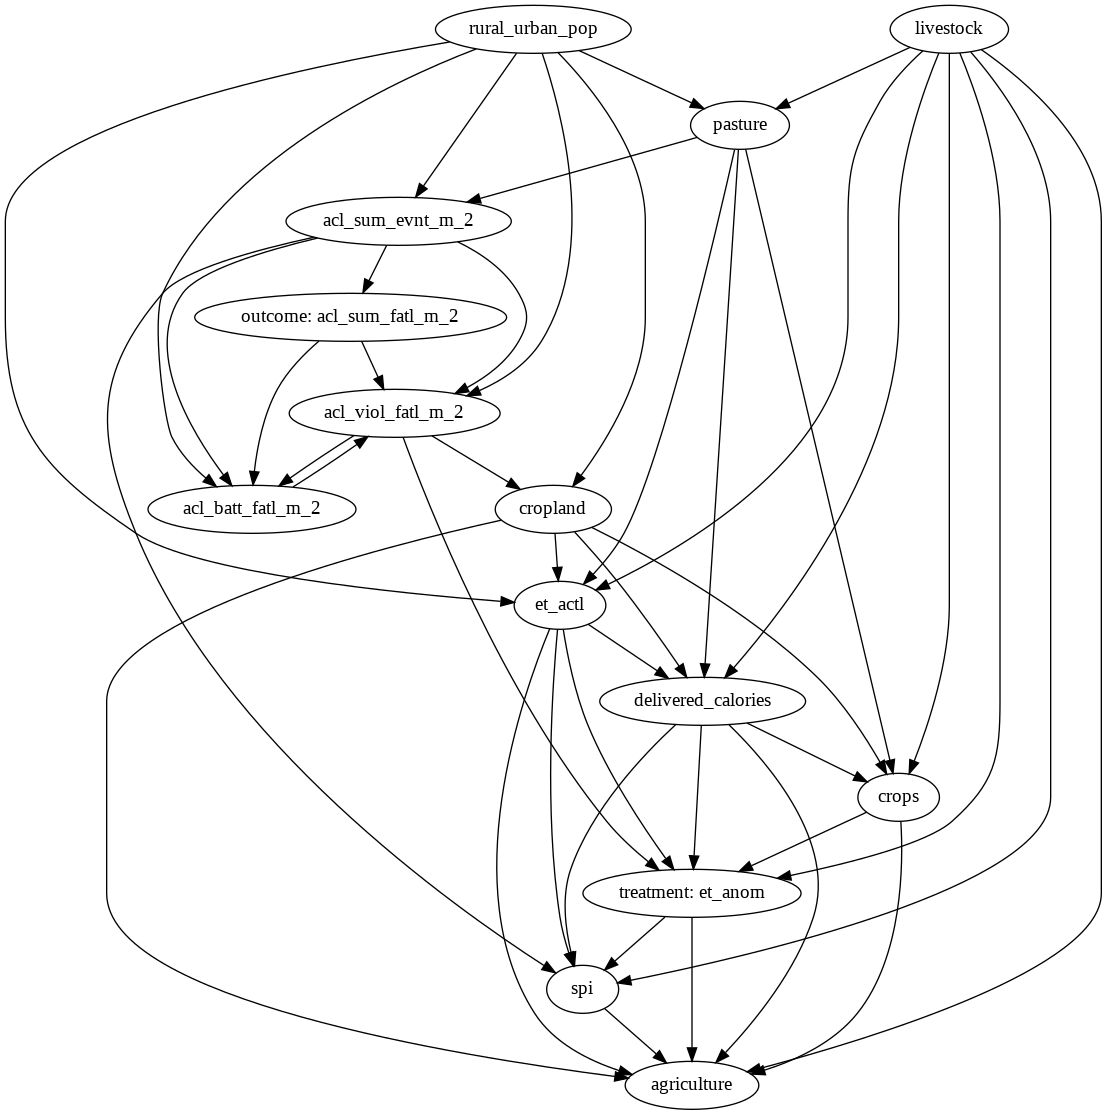

In [ ]:
#Check for another graph
region='Latin America & Caribbean'
month='2020-03-01'

treat='et_anom' #check for different treatments if it yields the same graph


file ='dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_'+month+'_'+region+'_flat.h5'
!gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/"$file" .
print(treat, month, region)
df = pd.read_hdf(file, "table")
print(df.head())
data_to_preprocess = df[['spi', 'et_actl', 'et_anom', 
                               'rural_urban_pop', 'agriculture', 'cropland',
                              'pasture', 'livestock', 'delivered_calories', 'acl_viol_fatl_m_2', 'acl_batt_fatl_m_2', 
                              'crops', 'acl_sum_fatl_m_2', 'acl_sum_evnt_m_2']]
data_prepared = data_prep_con(data_to_preprocess, treat, outcome, thresholds, month_date=None, region=None)
data_to_graph = data_prepared.preprocess()
causal_model = StaticCausalModel(data_to_graph, method_parameters)
print(data_to_graph.head())
causal_model.view_graph()
display(Image("causal_model.png"))

## **Identification, Estimation and Refutation**

Tested manually to see whether there exists a directed path between treatment and outcome

In [ ]:
file ='Combinations_directed_path.xlsx'
!gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/Output_Causal_Graphs_Contin/"$file" .
identifiables = pd.read_excel(file, sheet_name='Blad1', usecols=['Regions','Month','Treatment','Identifiable'])
identifiables['Regions'] = identifiables['Regions'].str.split().str.join(' ')

Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/Output_Causal_Graphs_Contin/Combinations_directed_path.xlsx...
- [1/1 files][ 11.4 MiB/ 11.4 MiB] 100% Done                                    
Operation completed over 1 objects/11.4 MiB.                                     
                Regions       Month Treatment  Identifiable
0   East Asia & Pacific  2019-12-01   et_actl             0
1   East Asia & Pacific  2019-12-01   et_anom             0
2   East Asia & Pacific  2019-12-01       spi             0
3   East Asia & Pacific  2020-03-01   et_actl             0
4   East Asia & Pacific  2020-03-01   et_anom             1
..                  ...         ...       ...           ...
67   Sub-Saharan Africa  2020-06-01   et_anom             0
68   Sub-Saharan Africa  2020-06-01       spi             1
69   Sub-Saharan Africa  2020-09-01   et_actl             1
70   Sub-Saharan Africa  2020-09-01   et_anom             0
71   Sub-Saharan Africa  2020-09

In [ ]:
identifiables['Causal_Estimate']=np.nan
identifiables['Standard_Error']=np.nan

,Regions,Month,Treatment,Identifiable,Causal_Estimate,Standard_Error
0,East Asia & Pacific,2019-12-01,et_actl,0,NaN,NaN
1,East Asia & Pacific,2019-12-01,et_anom,0,NaN,NaN
2,East Asia & Pacific,2019-12-01,spi,0,NaN,NaN
3,East Asia & Pacific,2020-03-01,et_actl,0,NaN,NaN
4,East Asia & Pacific,2020-03-01,et_anom,1,NaN,NaN
...,...,...,...,...,...,...
67,Sub-Saharan Africa,2020-06-01,et_anom,0,NaN,NaN
68,Sub-Saharan Africa,2020-06-01,spi,1,NaN,NaN
69,Sub-Saharan Africa,2020-09-01,et_actl,1,NaN,NaN
70,Sub-Saharan Africa,2020-09-01,et_anom,0,NaN,NaN


In [ ]:
#Check for every combination if manually observed identifiable, else continue
# If observed identifiable try identifiying and estimating, else continue
for treat, month, region in product(treatments, month_dates, regions):
  if identifiables.loc[(identifiables.Regions == region) & (identifiables.Month == month) & (identifiables.Treatment == treat),'Identifiable'].values[0] ==1:
    file ='dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_'+month+'_'+region+'_flat.h5'
    !gsutil -m cp -r gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/"$file" .
    df = pd.read_hdf(file, "table")
    data_to_preprocess = df[['local_pop', 'et_actl', 'et_anom', 
                                  'spi', 'rural_urban_pop', 'agriculture', 'cropland',
                                  'pasture', 'livestock', 'delivered_calories', 'acl_viol_fatl_m_2', 'acl_batt_fatl_m_2', 
                                  'crops', 'acl_sum_fatl_m_2', 'acl_sum_evnt_m_2']]
    data_prepared = data_prep_bin(data_to_preprocess, treat, outcome, thresholds, month_date=None, region=None)
    data_to_graph = data_prepared.preprocess()
    causal_model = StaticCausalModel(data_to_graph, method_parameters)
    try:
      identified_effect = causal_model.identification()
      try:
        estimated_effect, standard_error = causal_model.estimation()
        identifiables.loc[(identifiables.Regions == region) & (identifiables.Month == month) & (identifiables.Treatment == treat),'Causal_Estimate'] = estimated_effect.value
        identifiables.loc[(identifiables.Regions == region) & (identifiables.Month == month) & (identifiables.Treatment == treat),'Standard_Error'] = standard_error
      except:
        continue
    except:
      continue 
  else: 
    continue

Latin America & Caribbean spi 2019-12-01
0
South Asia spi 2019-12-01
0
Sub-Saharan Africa spi 2019-12-01
0
Europe & Central Asia spi 2019-12-01
0
Middle East & North Africa spi 2019-12-01
1
Copying gs://wps_pillar1a/data_working/phase_2/datacube_objects/HCSS_deliverables/dimensionality_reduced_slice_TSNE_boosted_complete_robust_scaler_50_copy_2_2019-12-01_Middle East & North Africa_flat.h5...
/ [1/1 files][397.9 KiB/397.9 KiB] 100% Done                                    
Operation completed over 1 objects/397.9 KiB.                                    
spi 2019-12-01 Middle East & North Africa
(2212, 15)
spi 2019-12-01 Middle East & North Africa Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                                                     
─────────────────(Expectation(outcome: acl_sum_fatl_m_2|acl_viol_fatl_m_2,deli
d[treatment: spi]                                                             

            

In [ ]:
  save_base = 'Causal_Effects'
  bucket_name = 'wps_pillar1a'
  save_dir = f'gs://{bucket_name}/data_working/phase_2/datacube_objects/HCSS_deliverables/Output_Causal_Graphs_Contin'

  # path within bucket
  save_name = save_base + '.xlsx'
  identifiables.to_excel(save_name, 'table')
  !gsutil cp "$save_name" "$save_dir"

Copying file://Causal_Effects.xlsx [Content-Type=application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]...
/ [1 files][  7.4 KiB/  7.4 KiB]                                                
Operation completed over 1 objects/7.4 KiB.                                      


## **Refutation**

In [ ]:
#A greater number of refutation methods are possible. Here we use four of them (i.e., random common cause, bootstrap, data subset, unobserved common cause).
#The descriptions of the methods are available here: https://microsoft.github.io/dowhy/readme.html#iv-refute-the-obtained-estimate
#In order to calculate statistics of each such method, one can bootstrap their estimates, including those of the bootstrap method itself. 
#However, this would take even longer to compute. At the same time, since the refutation methods are required to give a ball-park assessment, 
#it's not necessary to bootstraph their estimates, unless explicitly requested.

print(causal_model.refutation_by_random_common_cause())

In [ ]:
#Refutation takes longer to compute.
print(causal_model.refutation_by_bootstrap())

In [ ]:
#Refutation takes longer to compute.
print(causal_model.refutation_by_data_subset())

In [ ]:
#Refutation takes longer to compute.
print(causal_model.refutation_by_unobserved_common_cause())